In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

## Points to Polygon function 
- <b>dataframe</b>: GeoDataFrame with <code>Point</code> geometry column

In [5]:
def coords_to_polygon(dataframe):
    coords = []
    for row in dataframe.itertuples():
        coords.append(Point(row.Longitude, row.Latitude))
    poly_geom = Polygon(coords)
    gdf = gpd.GeoDataFrame(index=[0], crs=4326, geometry=[poly_geom])
    return gdf

## Decision Trees to Concave Hull function
- <b>parquet_fpath</b>: Parquet file path of decision trees file
- <b>title</b>: Title of the plot
- <b>concave_tightness</b>: 0 is for maximum concaveness, 1 for convex hull

In [6]:
def DT_to_Concave(parquet_fpath, title='DT Concave Hull', concave_tightness=0.6):
    # Reads Decision Trees (DT) Parquet
    df = pd.read_parquet(parquet_fpath)
    # Creates GeoDataFrame with point geometry and sets projection to 4326
    gdf = gpd.GeoDataFrame(data=df, crs=4326, geometry=[Point(row.Longitude, row.Latitude) for row in df.itertuples()])
    # Seperates points 'YES' predicted by decision trees
    gdf_yes = gdf[gdf['decision_tree_predicted']==1]
    gdf_yes_poly = coords_to_polygon(gdf_yes)
    # Extracts point geometry
    gdf_yes_geom = gdf_yes_poly.geometry
    # Generates Concave_hull() by parameters
    hull = gdf_yes_geom.concave_hull(ratio=concave_tightness, allow_holes=False)
    # Creates polygon without fill
    hull.plot(color='#fec44f',edgecolor='#636363')
    # Labels
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    return hull

## Neural Network to Concave Hull function
- <b>parquet_fpath</b>: Parquet file path of neural network file
- <b>title</b>: Title of the plot
- <b>concave_tightness</b>: 0 is for maximum concaveness, 1 for convex hull

In [7]:
def NN_to_Concave(parquet_fpath, title='NN Concave Hull', concave_tightness=0.6):
    # Reads Decision Trees (DT) Parquet
    df = pd.read_parquet(parquet_fpath)
    # Creates GeoDataFrame with point geometry and sets projection to 4326
    gdf = gpd.GeoDataFrame(data=df, crs=4326, geometry=[Point(row.Longitude, row.Latitude) for row in df.itertuples()])
    # Seperates points 'YES' predicted by decision trees
    gdf_yes = gdf[gdf['normalized_preds']==1]
    gdf_yes_poly = coords_to_polygon(gdf_yes)
    # Extracts point geometry
    gdf_yes_geom = gdf_yes_poly.geometry
    # Generates Concave_hull() by parameters
    hull = gdf_yes_geom.concave_hull(ratio=concave_tightness, allow_holes=False)
    # Creates polygon without fill
    hull.plot(color='#7fcdbb',edgecolor='#636363')
    # Labels
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    return hull

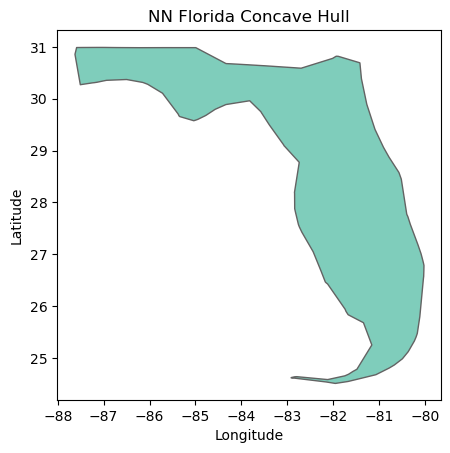

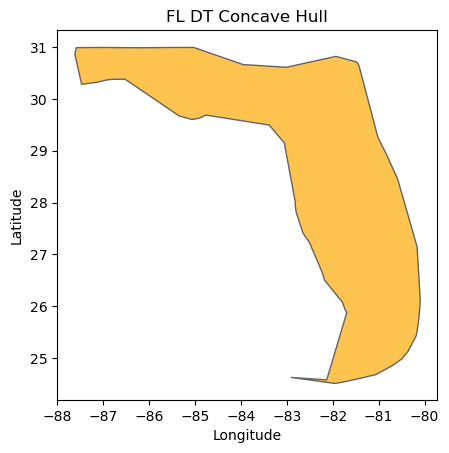

In [8]:
nn_fl = NN_to_Concave(parquet_fpath='all_exc_florida_pred_norm_nn.parquet',title='NN Florida Concave Hull',concave_tightness=0.1)
dt_fl = DT_to_Concave('all_exc_florida_train_florida_pred_dt.parquet',title='FL DT Concave Hull', concave_tightness=0.2)

## Comparitive analysis of Neural Networks and Decision Trees

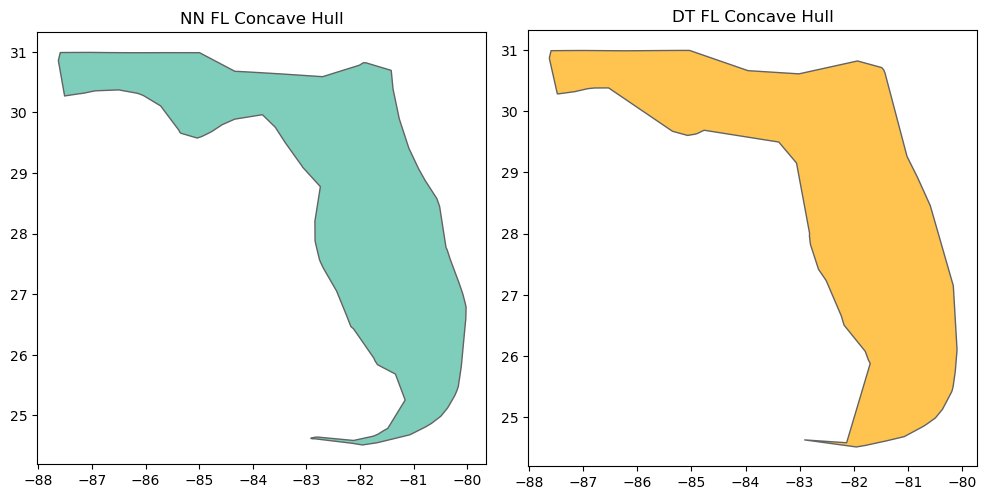

In [9]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Neural Networks plot
nn_fl.plot(ax=axs[0],color='#7fcdbb',edgecolor='#636363')
axs[0].set_title(f'NN FL Concave Hull')
# Decision trees plot
dt_fl.plot(ax=axs[1], color='#fec44f',edgecolor='#636363')
axs[1].set_title(f'DT FL Concave Hull')
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()